# ****Section3.2** 线性回归实现**
(动手学机器学习)

In [30]:
import random
import torch

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


**给定w,b生成num_examples组数据X,y使:**

$$y=Wx+b$$

In [31]:
def synthetic_data(w, b, num_examples): #@save
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1,1)

随便找一个W和b，并且生成1000组数据，接下来我们将用这一千组数据来反推W和b

In [32]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [33]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 1.0331, -1.9497]) 
label: tensor([12.8858])


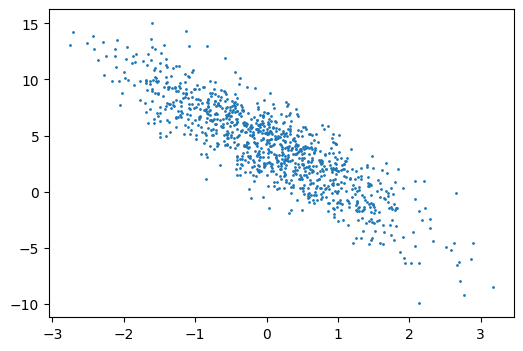

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), s=1)

生成迭代器data_iter，用于把features和labels分批(每批batch_size个)发放

In [35]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

初始化猜测的参数W和b

In [36]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [37]:
#线性回归函数，在这里扮演预测网络的作用
def linreg(X, w, b):
    return torch.matmul(X,w)+b

In [38]:
#均方损失函数
def square_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [39]:
#随机梯度下降函数:lr是所谓学习率
def sgd(params, lr, batch_size):
    with torch.no_grad():#在下面的代码框内禁用torch的梯度计算
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_() #梯度置零

In [40]:
#参数设置
lr = 0.03
num_epochs = 3
net = linreg #net即我们的预测网络在这里就是线性回归函数linreg
loss = square_loss
batch_size = 10

## 下面是最终的学习部分(training part)

In [41]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')   

epoch 1, loss 0.044807
epoch 2, loss 0.000185
epoch 3, loss 0.000050
